# Notes

- Noticed and explored the existance of plenty binary features
- From the exploratory data analysis it could be seen that the 2 classes are well demarked from each other
- Log transformation was sufficient for the performance of the models
- Feature selection using ANOVA
- Compared Pytorch Neural Net against Random Forrest
  

<b> Comments <b>
- 1 is legitimate 0 is not

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
phiusiil_phishing_url_website = fetch_ucirepo(id=967) 
  
# data (as pandas dataframes) 
X = phiusiil_phishing_url_website.data.features 
y = phiusiil_phishing_url_website.data.targets 

In [5]:
phiusiil_phishing_url_website.metadata

{'uci_id': 967,
 'name': 'PhiUSIIL Phishing URL (Website)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset',
 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv',
 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.',
 'area': 'Computer Science',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 235795,
 'num_features': 54,
 'feature_types': ['Real', 'Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['label'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2024,
 'last_updat

Label 1 corresponds to a legitimate URL, label 0 to a phishing URL

In [7]:
phiusiil_phishing_url_website.variables

,name,role,type,demographic,description,units,missing_values
0,FILENAME,Other,Categorical,None,None,None,no
1,URL,Feature,Categorical,None,None,None,no
2,URLLength,Feature,Integer,None,None,None,no
3,Domain,Feature,Categorical,None,None,None,no
4,DomainLength,Feature,Integer,None,None,None,no
5,IsDomainIP,Feature,Integer,None,None,None,no
6,TLD,Feature,Categorical,None,None,None,no
7,URLSimilarityIndex,Feature,Integer,None,None,None,no
8,CharContinuationRate,Feature,Integer,None,None,None,no
9,TLDLegitimateProb,Feature,Continuous,None,None,None,no


In [8]:
data = pd.concat((X,y), axis = 1)

In [9]:
data

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,...,1,0,1,51,7,21,187,2,191,1
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,...,1,0,0,50,1,7,88,0,31,1
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,...,0,0,1,27,10,30,58,2,67,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,...,0,0,0,0,0,3,0,0,0,0


In [10]:
for col in data.select_dtypes(include="object").columns:
    print(col,len(data[col].value_counts()))

URL 235370
Domain 220086
TLD 695
Title 197874


In [11]:
data.drop(columns = ["URL", "Domain", "TLD", "Title"], inplace = True)

In [12]:
data.drop_duplicates(inplace = True)

In [13]:
data

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,100.000000,1.000000,0.522907,0.061933,3,1,0,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,100.000000,0.666667,0.032650,0.050207,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,100.000000,1.000000,0.522907,0.057606,3,1,0,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,100.000000,1.000000,0.079963,0.059441,3,1,0,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,100.000000,1.000000,0.522907,0.058739,3,1,0,...,1,0,1,51,7,21,187,2,191,1
235791,28,21,0,100.000000,0.785714,0.028555,0.053834,2,2,0,...,1,0,0,50,1,7,88,0,31,1
235792,30,23,0,100.000000,1.000000,0.003319,0.063093,2,1,0,...,0,0,1,27,10,30,58,2,67,1
235793,55,47,0,28.157537,0.465116,0.000961,0.050211,3,2,0,...,0,0,0,0,0,3,0,0,0,0


# EDA

In [15]:
value_counts_list = {}
for col in data.columns:
    i = {col:len(data[col].value_counts())}
    value_counts_list.update(i)

value_counts_ = pd.DataFrame.from_dict(value_counts_list, orient = "index", columns=['Value Counts'])


value_list = {}

for col in data.columns:
    values = {col : [data[col].unique()]}
    value_list.update(values)
    
unique_values_list = pd.DataFrame.from_dict(value_list,orient='index', columns = ["Unique Values"])



unique_values_df = pd.merge(left= value_counts_,
    right = unique_values_list,
    how='inner',
    left_index=True, right_index=True)

In [16]:
unique_values_df

,Value Counts,Unique Values
URLLength,482,"[31, 23, 29, 26, 33, 30, 25, 18, 22, 27, 20, 2..."
DomainLength,101,"[24, 16, 22, 19, 26, 23, 18, 11, 20, 13, 17, 1..."
IsDomainIP,2,"[0, 1]"
URLSimilarityIndex,36360,"[100.0, 82.6446281, 55.28492647, 56.55114117, ..."
CharContinuationRate,898,"[1.0, 0.666666667, 0.866666667, 0.625, 0.92307..."
TLDLegitimateProb,465,"[0.5229071, 0.0326503, 0.028555, 0.0799628, 0...."
URLCharProb,227421,"[0.061933179, 0.050207214, 0.06412872, 0.05760..."
TLDLength,12,"[3, 2, 4, 5, 6, 7, 8, 9, 10, 13, 11, 12]"
NoOfSubDomain,10,"[1, 2, 3, 0, 5, 4, 6, 8, 10, 7]"
HasObfuscation,2,"[0, 1]"


In [17]:
unique_values_df.reset_index(inplace = True)

In [18]:
unique_values_df.rename(columns = {"index":"Column Names"}, inplace=True)

In [19]:
filtered_columns = unique_values_df[unique_values_df["Value Counts"] > 2]
binary_columns = unique_values_df[unique_values_df["Value Counts"] == 2]

In [20]:
filtered_features_list = filtered_columns["Column Names"].tolist()

In [21]:
binary_features_list = binary_columns["Column Names"].tolist()

In [22]:
y.shape,X.shape,data.shape, data[filtered_features_list].shape, data[binary_features_list].shape

((235795, 1), (235795, 54), (234987, 51), (234987, 31), (234987, 20))

<b> Y </b> is for the target <br>
<b> X </b> is for the independent features <br>
<b> data </b> holds all the data <br>
<b> data[filtered_features_list] </b> holds all the features except for binary <br>
<b> data[binary_features_list] </b> holds all the binary features <br>


In [24]:
data.label.value_counts()

label
1    134850
0    100137
Name: count, dtype: int64

In [25]:
data.iloc[:, :-1] #everything up until last column

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,24,0,100.000000,1.000000,0.522907,0.061933,3,1,0,...,1,0,0,1,34,20,28,119,0,124
1,23,16,0,100.000000,0.666667,0.032650,0.050207,2,1,0,...,0,0,0,1,50,9,8,39,0,217
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,2,0,...,0,0,0,1,10,2,7,42,2,5
3,26,19,0,100.000000,1.000000,0.522907,0.057606,3,1,0,...,0,1,1,1,3,27,15,22,1,31
4,33,26,0,100.000000,1.000000,0.079963,0.059441,3,1,0,...,1,1,0,1,244,15,34,72,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,100.000000,1.000000,0.522907,0.058739,3,1,0,...,0,1,0,1,51,7,21,187,2,191
235791,28,21,0,100.000000,0.785714,0.028555,0.053834,2,2,0,...,0,1,0,0,50,1,7,88,0,31
235792,30,23,0,100.000000,1.000000,0.003319,0.063093,2,1,0,...,0,0,0,1,27,10,30,58,2,67
235793,55,47,0,28.157537,0.465116,0.000961,0.050211,3,2,0,...,0,0,0,0,0,0,3,0,0,0


In [26]:
data_int = data.select_dtypes(include = "int64")

In [27]:
columns_list = [
    "URLLength",
    "DomainLength",
    "NoOfLettersInURL",
    "TLDLength",
    "LargestLineLength",
    "LineOfCode",
    "NoOfSubDomain",
    "NoOfImage",
    "NoOfExternalRef",
    "NoOfJS",
    "NoOfCSS"
]

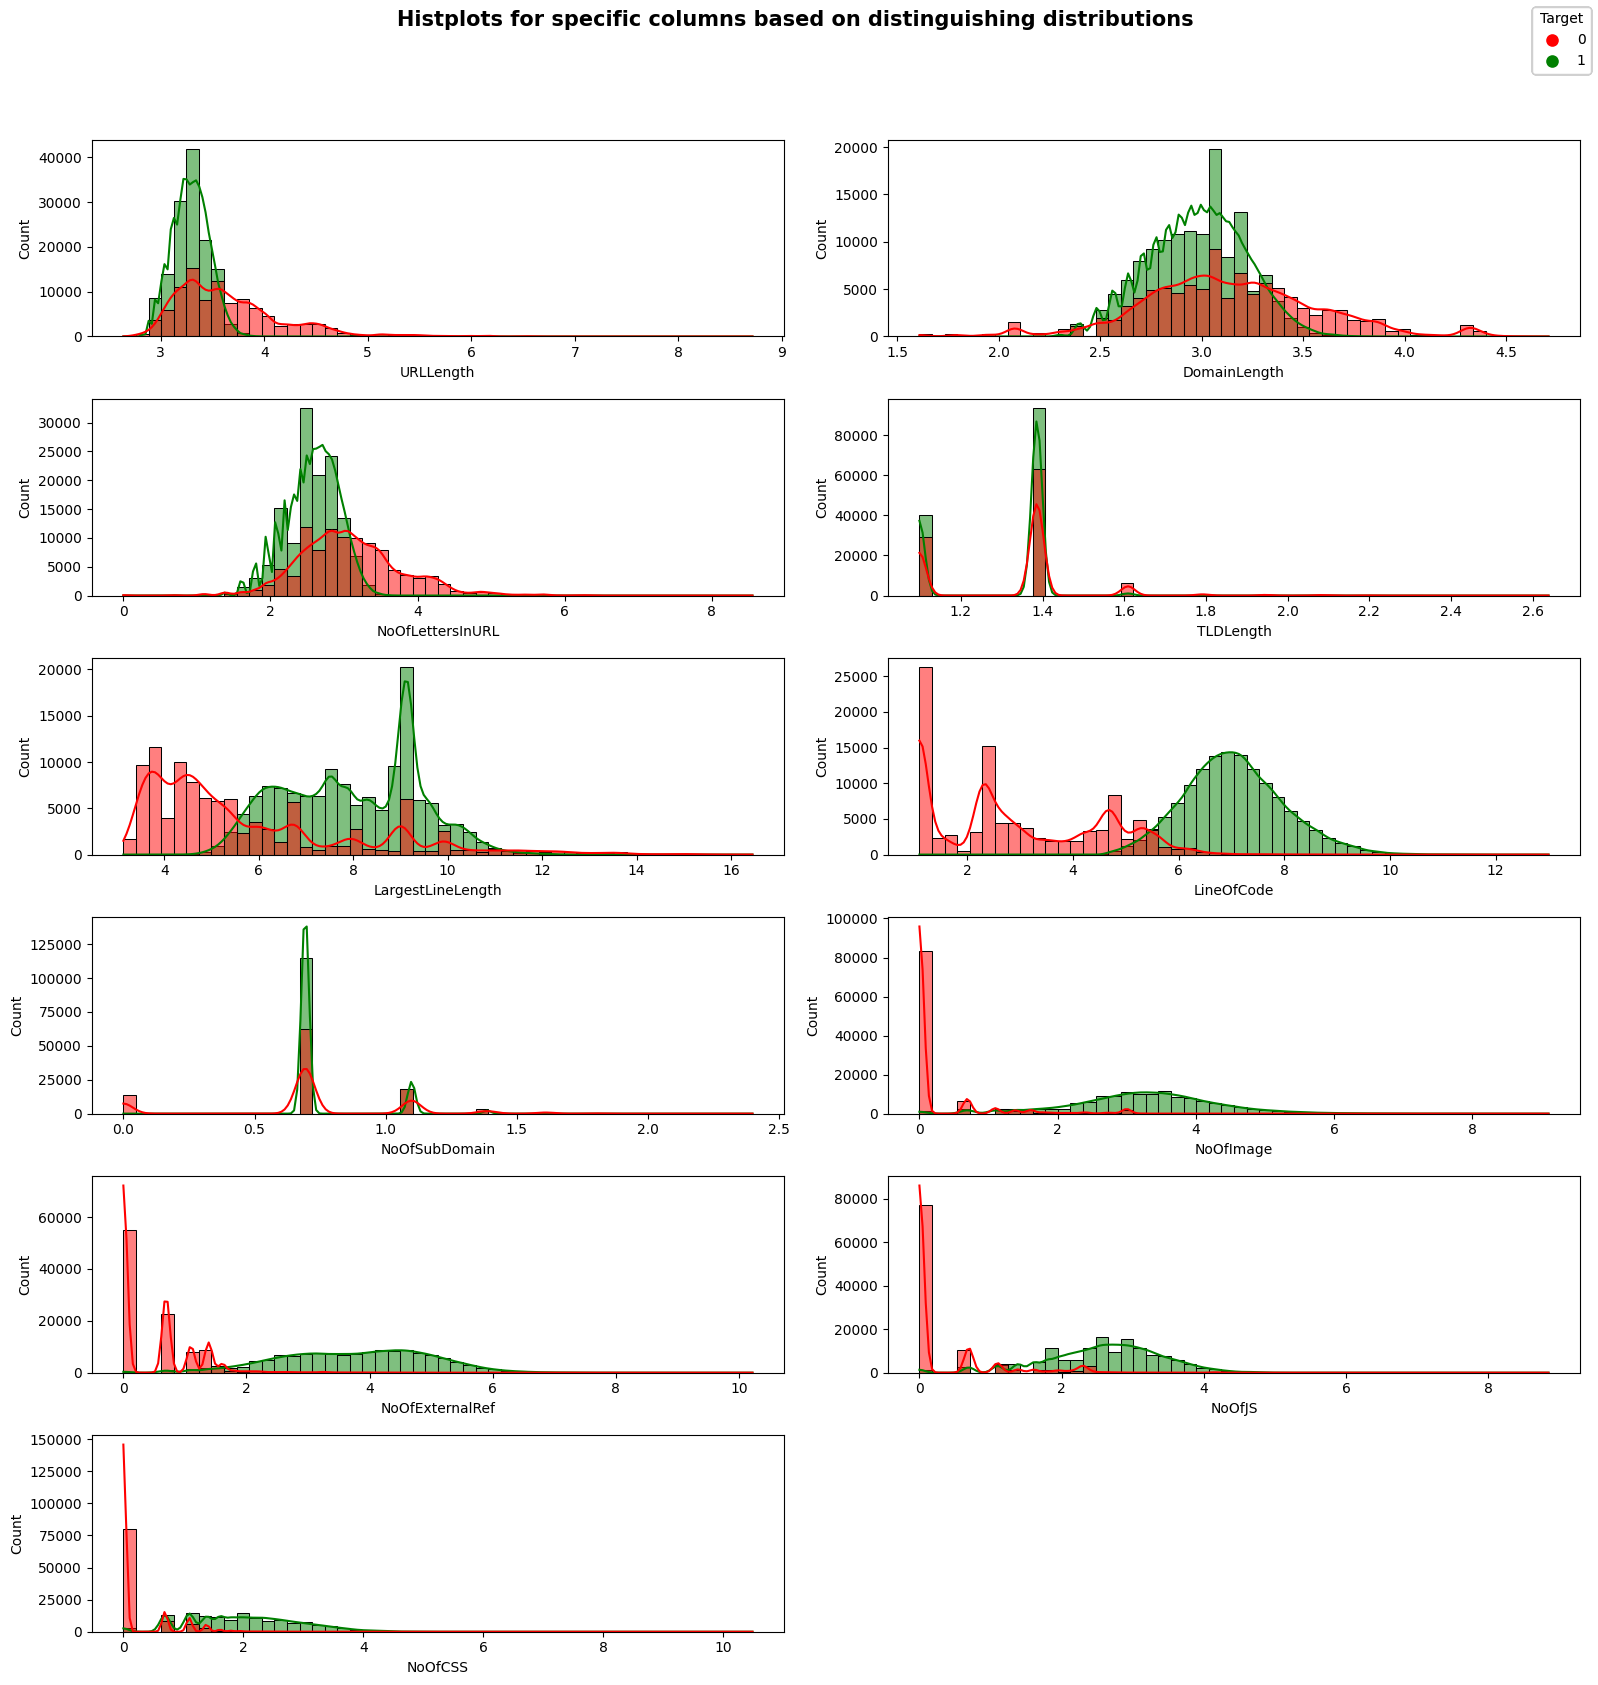

In [28]:
fig, axes = plt.subplots(6,2, figsize= (16,16), tight_layout = True)

axes = axes.flatten()
target_mapping = {0:"red", 1:"green"}
hue_colors = list(target_mapping.values())
hue_labels = list(target_mapping.keys())

for col, ax in zip(data_int[columns_list].columns, axes):
    g =sns.histplot(
        data=data_int,
        x=np.log1p(data_int[col]), 
        hue=data["label"],
        palette = target_mapping,
        stat='count',
        bins=50,
        multiple='layer',
        element='bars',
        fill=True,
        shrink=1,
        kde=True,
        legend=True,
        ax=ax
    ).get_legend().remove()
    
    handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=8) 
               for color in hue_colors]
    
    fig.legend(handles, hue_labels, loc='upper right', title="Target", fontsize=10)

    

[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

plt.suptitle("Histplots for specific columns based on distinguishing distributions", y = 1.05, fontweight = "bold", fontsize=15)
    
plt.show()

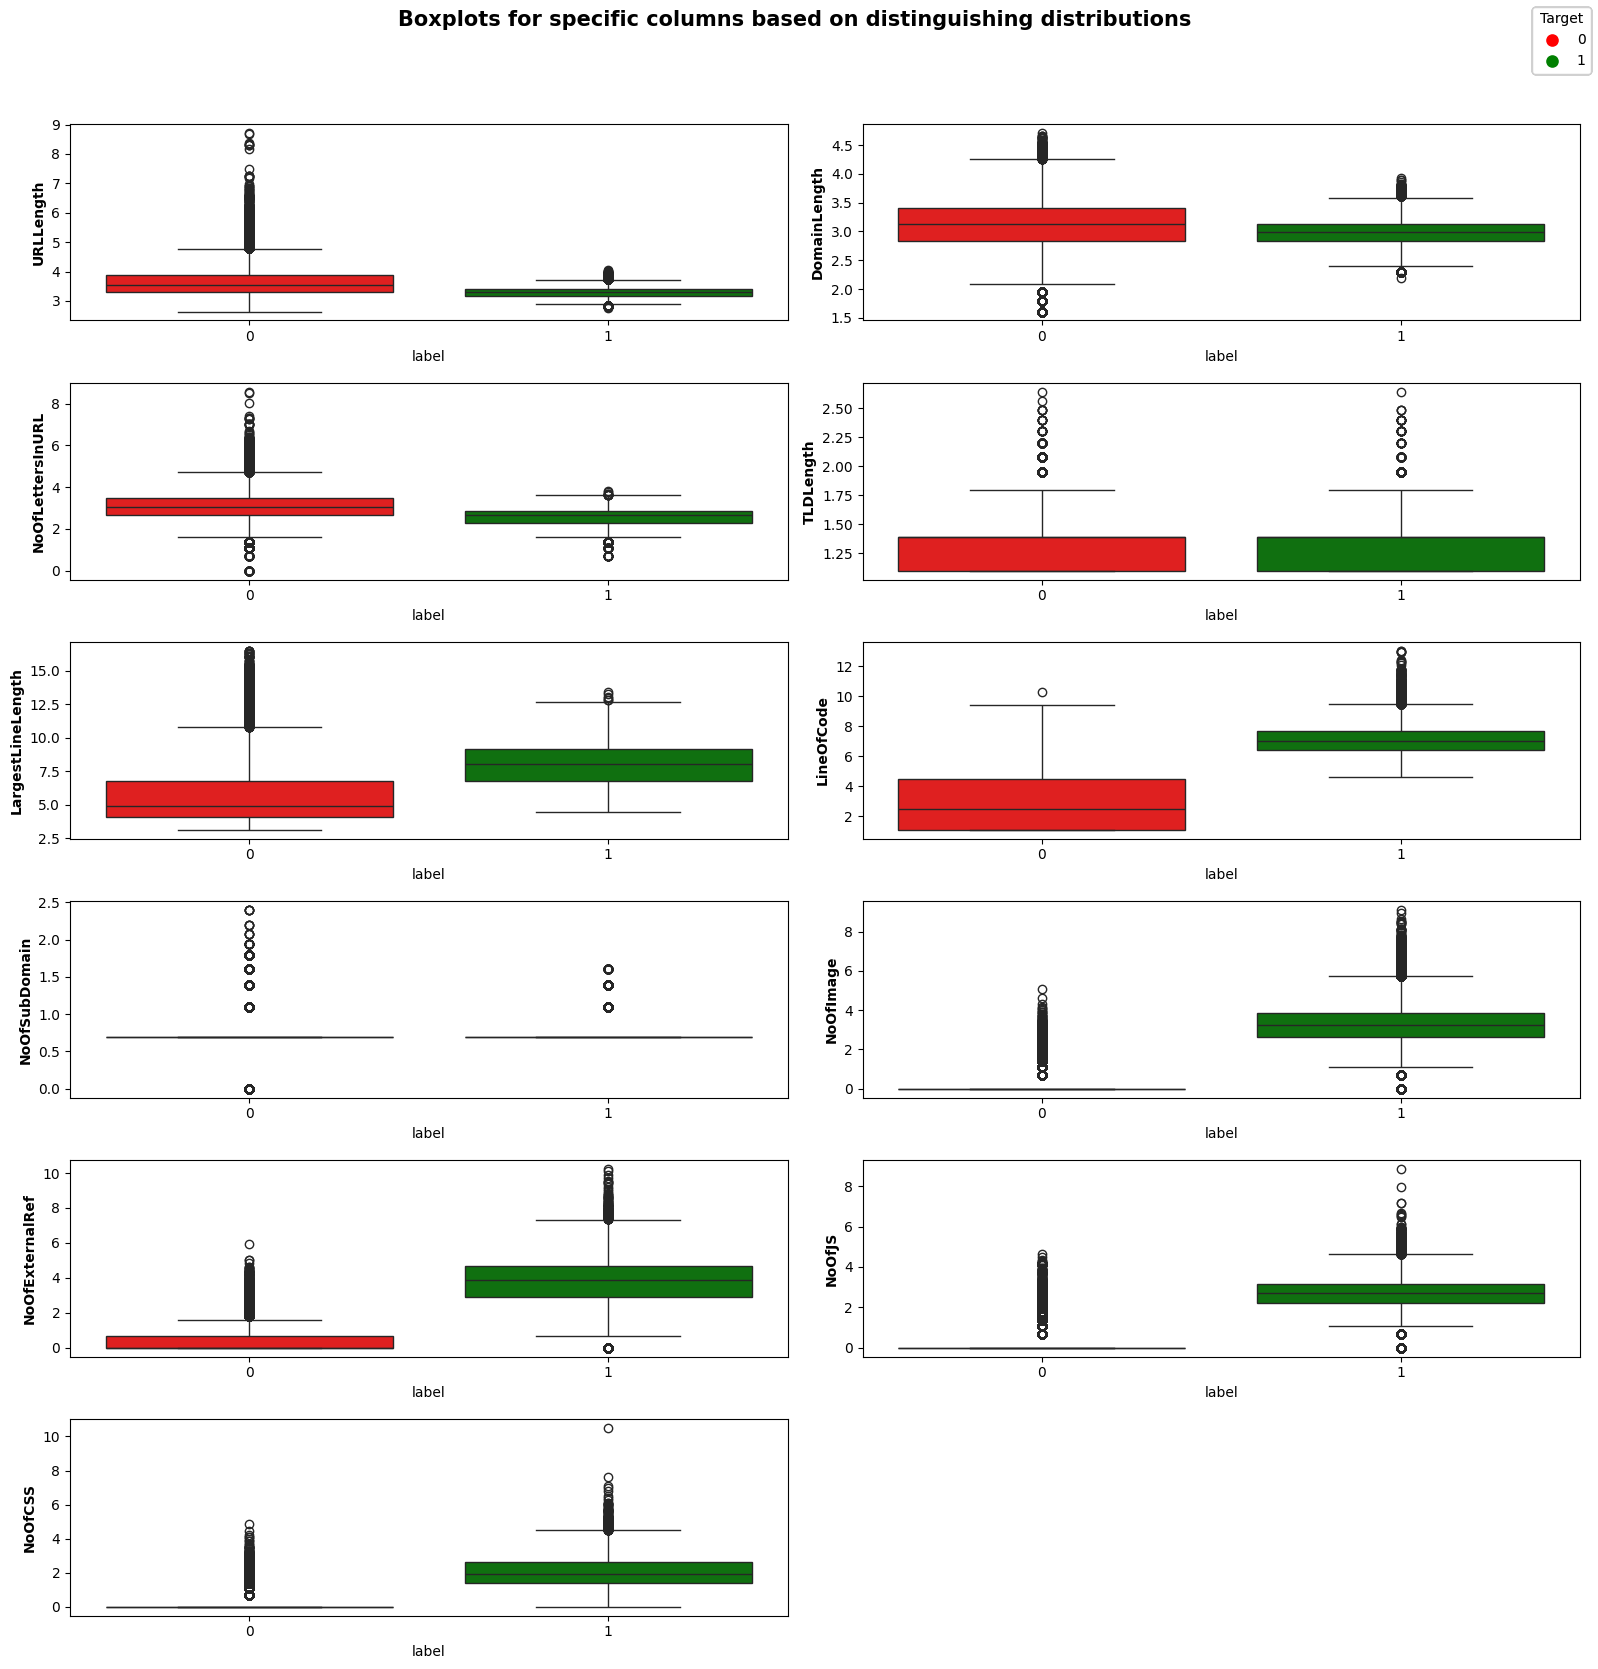

In [29]:
fig, axes = plt.subplots(6,2, figsize= (16,16), tight_layout = True)

axes = axes.flatten()


for col, ax in zip(data_int[columns_list].columns, axes):
    g=sns.boxplot(
        data=data_int,
        y=np.log1p(data_int[col]),
        x=data["label"], 
        hue=data["label"],
        palette = target_mapping,
        fill=True,
        legend=True,
        ax=ax
    ).get_legend().remove()
    
    ax.set_ylabel(col,fontsize=10,fontweight="bold")
    
    fig.legend(handles, hue_labels, loc='upper right', title="Target", fontsize=10)

    handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=8) 
               for color in hue_colors]
    
[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

plt.suptitle("Boxplots for specific columns based on distinguishing distributions", y = 1.04, fontweight = "bold", fontsize=15)
    
plt.show()

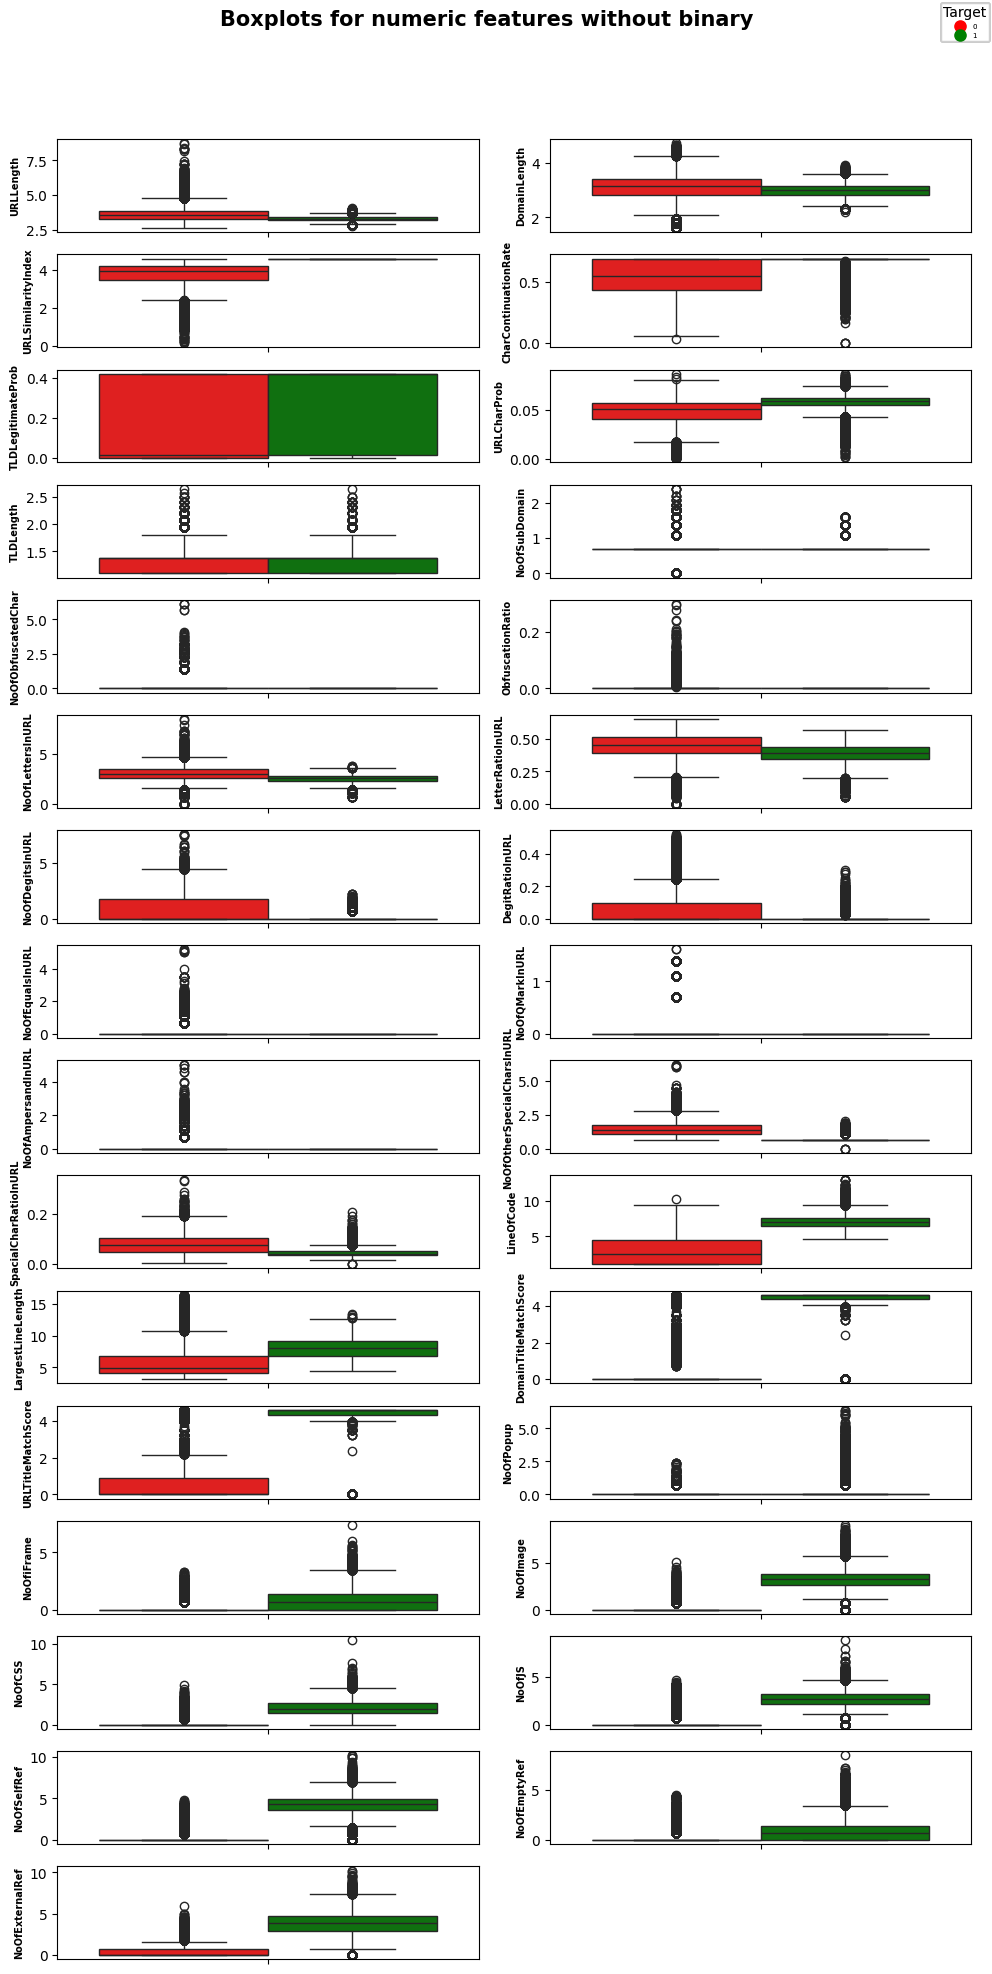

In [30]:
fig, axes = plt.subplots(17,2, figsize= (10,20),tight_layout=True)

axes = axes.flatten()


for col, ax in zip(data[filtered_features_list].columns, axes):
    sns.boxplot(
        data=data[filtered_features_list],
        y=np.log1p(data[filtered_features_list][col]), 
        hue=data["label"],
        palette=target_mapping,
        fill=True,
        legend=True,
        ax=ax
    ).get_legend().remove()
    
    fig.legend(handles, hue_labels, loc='upper right', title="Target", fontsize=5)

    handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=8) 
               for color in hue_colors]
    ax.set_ylabel(col, fontweight="bold",fontsize=7)
    
[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

plt.suptitle("Boxplots for numeric features without binary", y = 1.04, fontweight = "bold", fontsize=15)
    
plt.show()

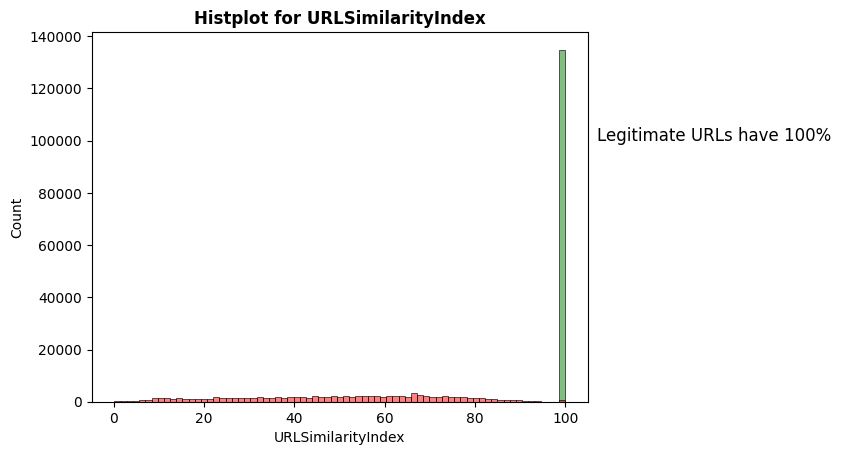

In [31]:
sns.histplot(data = data[["URLSimilarityIndex","label"]], x = "URLSimilarityIndex", palette = target_mapping,  hue = "label").get_legend().remove()
    
fig.legend(handles, hue_labels, loc='upper right', title="Target", fontsize=5)

handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=8) 
           for color in hue_colors]

plt.text(x=107, y=100000, s="Legitimate URLs have 100%", fontsize=12, color='black')

plt.title("Histplot for URLSimilarityIndex", fontweight = "bold")

plt.show()

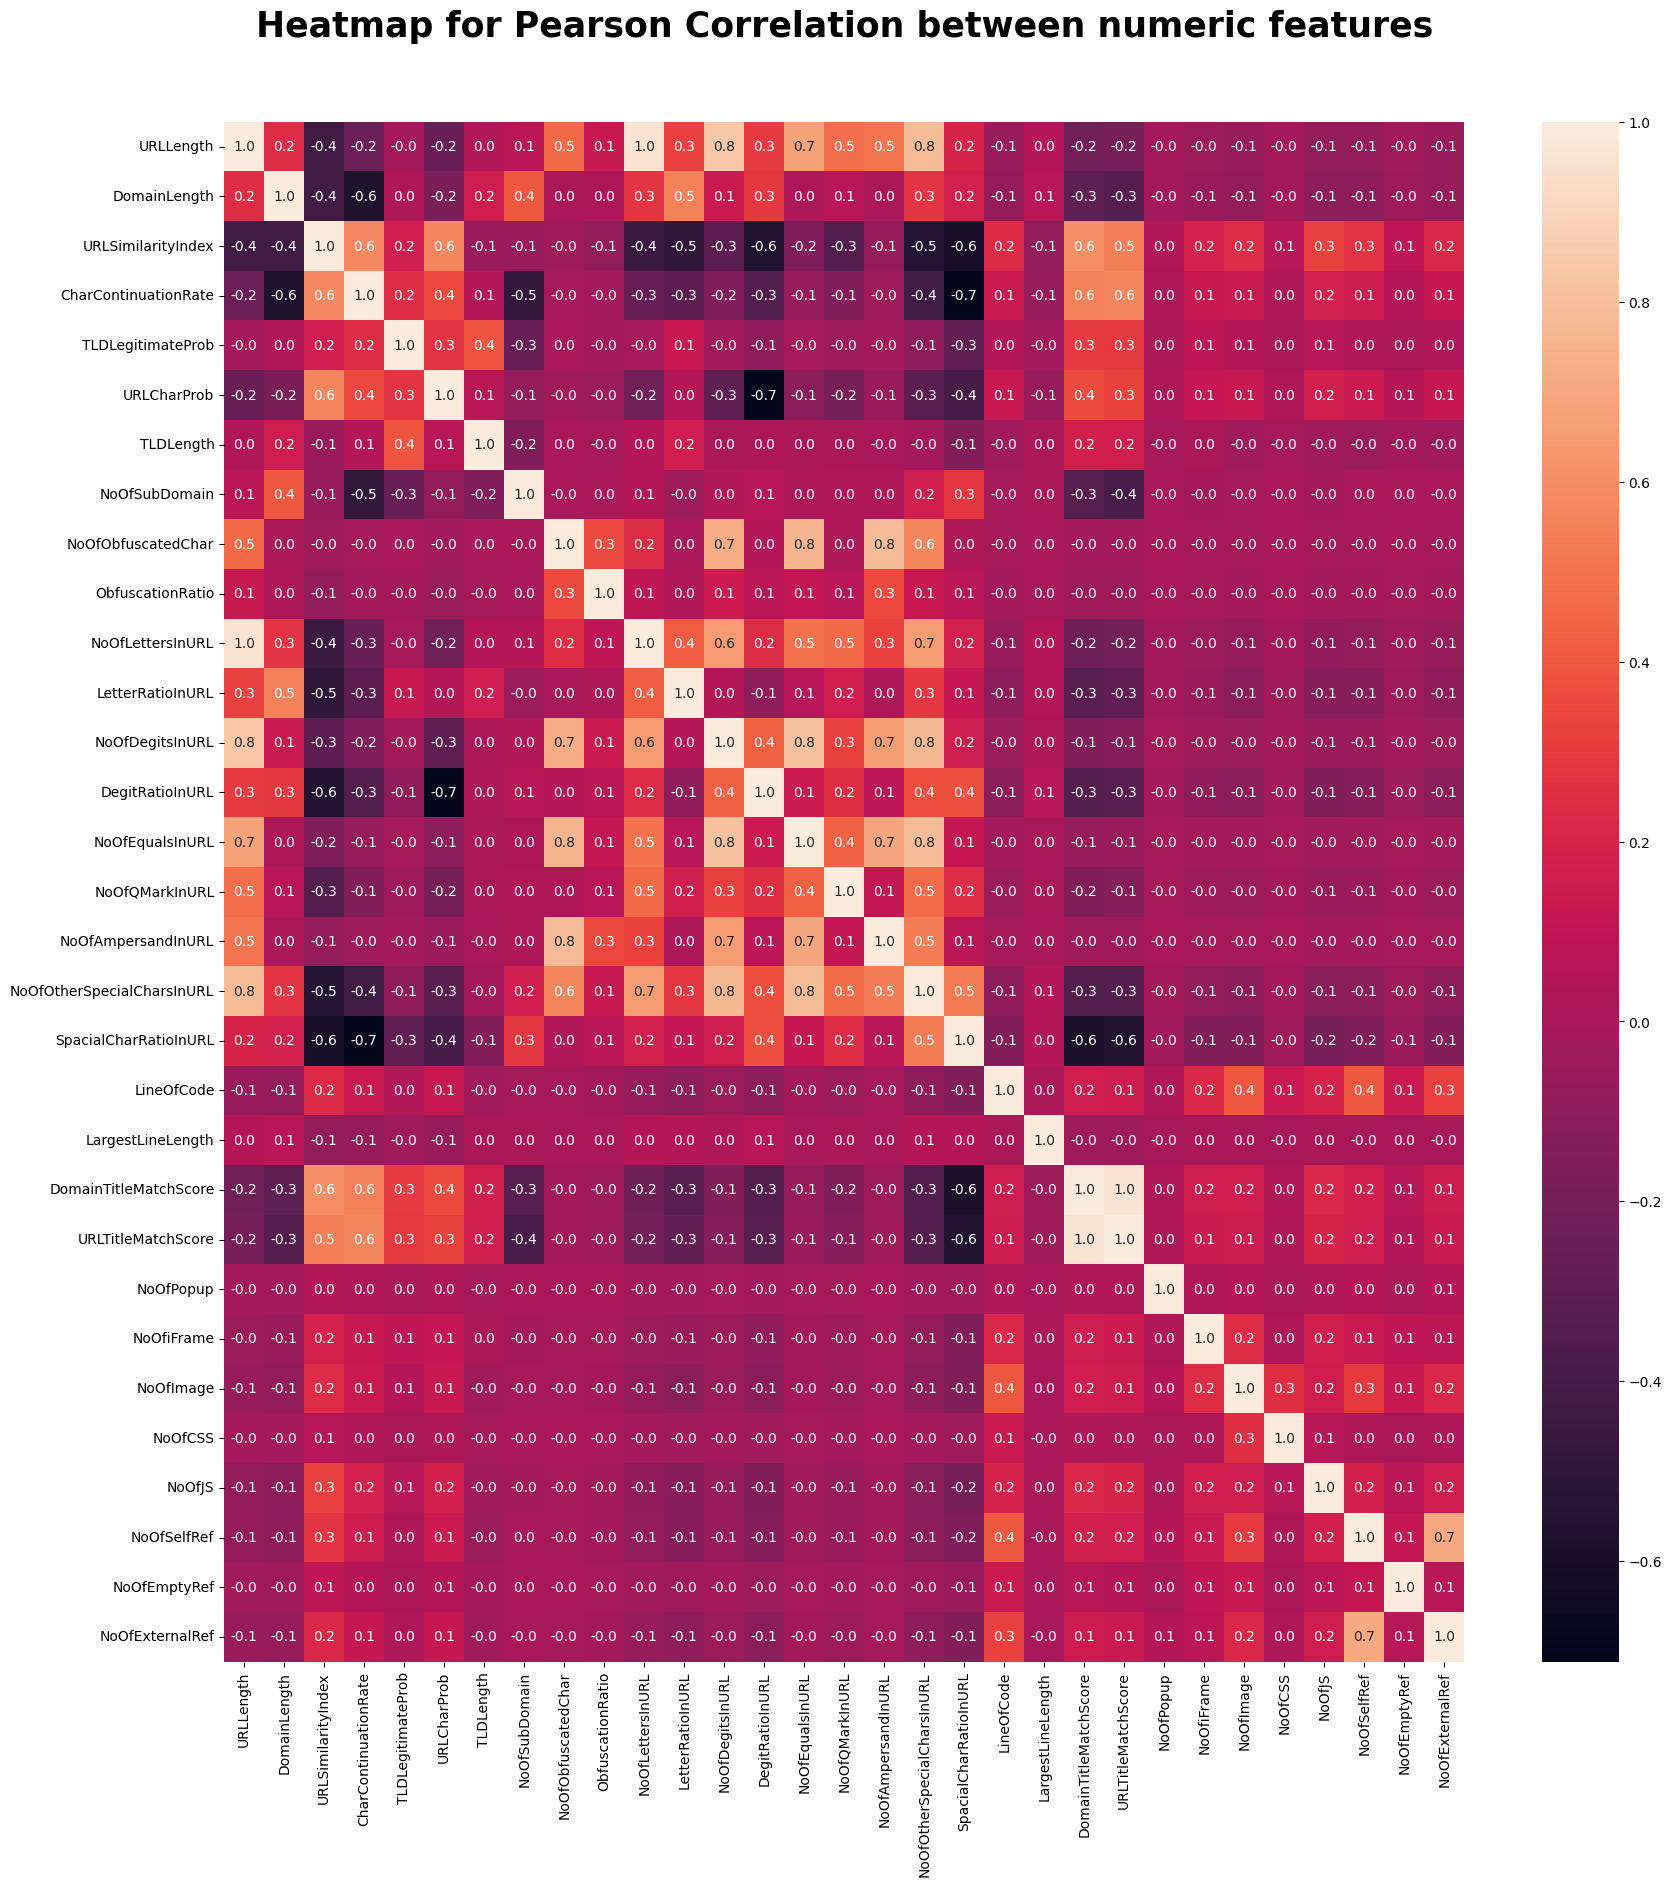

In [32]:
plt.figure(figsize=(20,20))

sns.heatmap(data[filtered_features_list].corr(), annot = True, fmt=".1f")

plt.title("Heatmap for Pearson Correlation between numeric features", fontsize=25, fontweight = "bold", y=1.05)

plt.show()

Features that are highly correlated and may be chosen either one or the other: 
<br>
<br>
<u>URLTitleMatchScore</u> (to drop) and DomainTitleMatchScore 

In [34]:
features_with_ratio = [
    "CharContinuationRate",
    "ObfuscationRatio",
    "LetterRatioInURL",
    "DegitRatioInURL",
    "SpacialCharRatioInURL"
]
features_with_number = [
    "NoOfSubDomain",
    "NoOfObfuscatedChar",
    "NoOfLettersInURL",
    "NoOfDegitsInURL",
    "NoOfEqualsInURL",
    "NoOfQMarkInURL",
    "NoOfAmpersandInURL",
    "NoOfOtherSpecialCharsInURL",
    "NoOfPopup",
    "NoOfiFrame",
    "NoOfImage",
    "NoOfCSS",
    "NoOfJS",
    "NoOfSelfRef",
    "NoOfEmptyRef",
    "NoOfExternalRef"
]


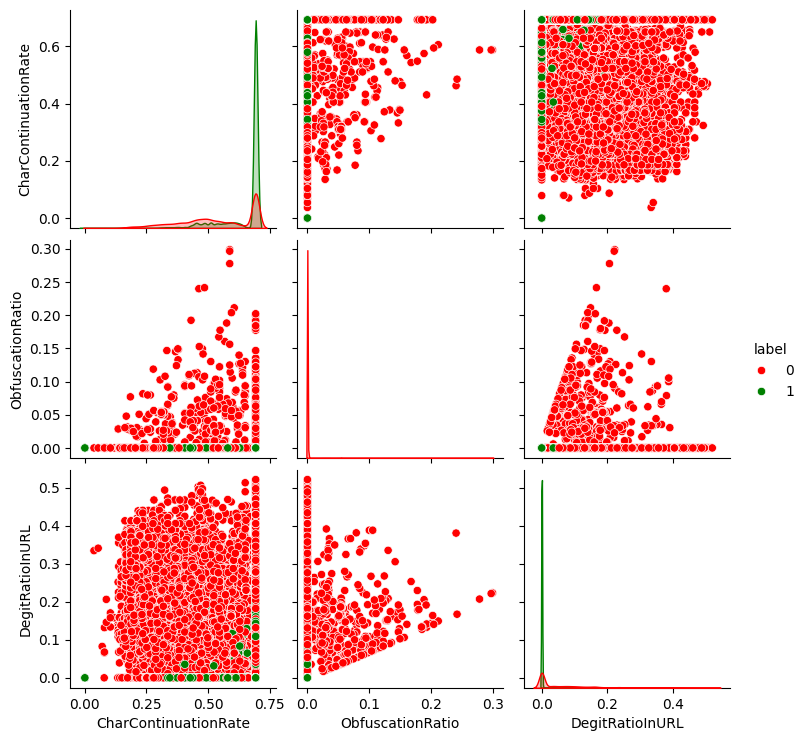

In [35]:
data_log = data.copy()

numeric_cols = ["CharContinuationRate", 
        "ObfuscationRatio", 
        "DegitRatioInURL", 
        ]
data_log[numeric_cols] = np.log1p(data[numeric_cols]) 

g = sns.pairplot(
    data=data_log,
    x_vars=["CharContinuationRate", "ObfuscationRatio", "DegitRatioInURL"],
    y_vars=["CharContinuationRate", "ObfuscationRatio", "DegitRatioInURL"],
    hue="label", 
    palette=target_mapping
)
plt.show()

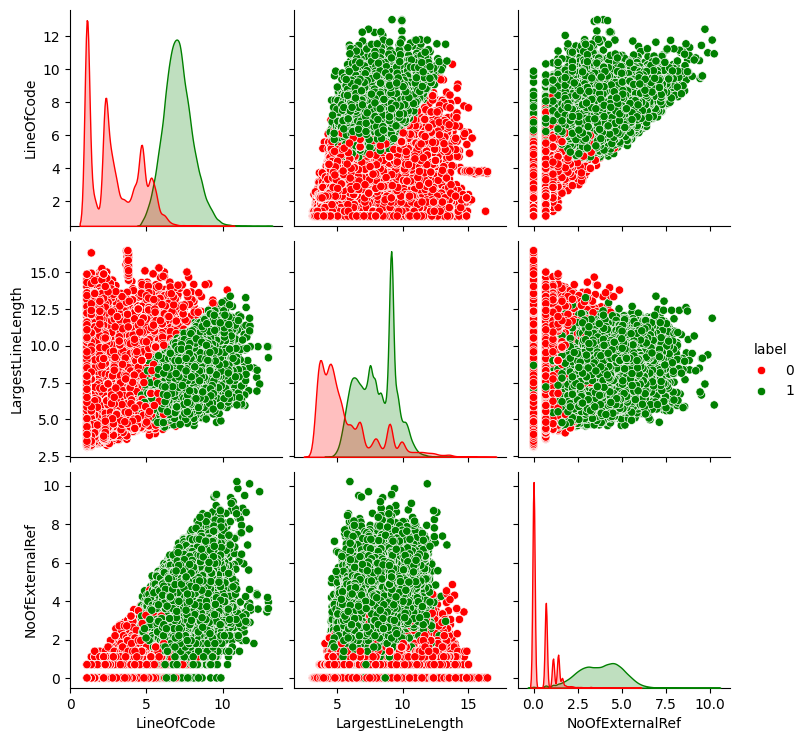

In [36]:
data_log = data.copy()
numeric_cols = ["LineOfCode", "LargestLineLength", "NoOfExternalRef"]
data_log[numeric_cols] = np.log1p(data[numeric_cols])  

# Pairplot
g = sns.pairplot(
    data=data_log,
    x_vars=["LineOfCode", "LargestLineLength", "NoOfExternalRef"],
    y_vars=["LineOfCode", "LargestLineLength", "NoOfExternalRef"],
    hue="label", 
    palette=target_mapping
)
plt.show()

Overall, from these visualizing techniques, we may conclude that there is a great difference between the distributions of values that most features get for each of the labels, will need to see during feature selection what does this translate to

In [38]:
data

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,100.000000,1.000000,0.522907,0.061933,3,1,0,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,100.000000,0.666667,0.032650,0.050207,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,100.000000,1.000000,0.522907,0.057606,3,1,0,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,100.000000,1.000000,0.079963,0.059441,3,1,0,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,100.000000,1.000000,0.522907,0.058739,3,1,0,...,1,0,1,51,7,21,187,2,191,1
235791,28,21,0,100.000000,0.785714,0.028555,0.053834,2,2,0,...,1,0,0,50,1,7,88,0,31,1
235792,30,23,0,100.000000,1.000000,0.003319,0.063093,2,1,0,...,0,0,1,27,10,30,58,2,67,1
235793,55,47,0,28.157537,0.465116,0.000961,0.050211,3,2,0,...,0,0,0,0,0,3,0,0,0,0


# Preprocessing Data

In [40]:
!pip install scikit-learn

In [41]:
data_logged = np.log1p(data.iloc[:,:-1])

In [42]:
data_logged["label"] = data["label"]

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().set_output(transform= "pandas")

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test  = train_test_split(data_logged.iloc[:,:-1], data_logged["label"], test_size=0.1, random_state=42, shuffle=True, stratify=data_logged["label"])


<b> X_train, X_test, y_train, y_test <b>

# Feature Selection

In [46]:
from sklearn.feature_selection import f_classif #computes ANOVA 
from sklearn.feature_selection import SelectKBest  #Orders f statistics and selects the Kbest ones





anova = SelectKBest(f_classif, k=19)


X_anova = anova.fit_transform(data_logged.iloc[:,:-1], data_logged["label"])

anova_results = pd.DataFrame({'Feature': data_logged.iloc[:,:-1].columns, 
                              'F-value': anova.scores_,
                              'p-value': anova.pvalues_})

anova_results.sort_values(by='F-value', ascending=False, inplace=True)

selected_features = pd.Series(anova.get_support(), index = data_logged.iloc[:,:-1].columns)

selected_features,  anova_results

(URLLength                     False
 DomainLength                  False
 IsDomainIP                    False
 URLSimilarityIndex             True
 CharContinuationRate          False
 TLDLegitimateProb             False
 URLCharProb                   False
 TLDLength                     False
 NoOfSubDomain                 False
 HasObfuscation                False
 NoOfObfuscatedChar            False
 ObfuscationRatio              False
 NoOfLettersInURL              False
 LetterRatioInURL              False
 NoOfDegitsInURL               False
 DegitRatioInURL               False
 NoOfEqualsInURL               False
 NoOfQMarkInURL                False
 NoOfAmpersandInURL            False
 NoOfOtherSpecialCharsInURL     True
 SpacialCharRatioInURL          True
 IsHTTPS                        True
 LineOfCode                     True
 LargestLineLength              True
 HasTitle                      False
 DomainTitleMatchScore          True
 URLTitleMatchScore             True
 

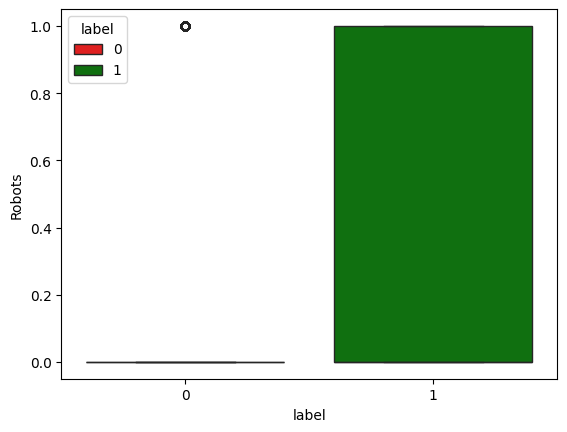

In [47]:
g = sns.boxplot(y = data["Robots"], x=data["label"], hue = data["label"], palette = target_mapping)
plt.show()

In [48]:
data.loc[data["label"] == 0,"Robots"].value_counts() #the outlier in robots is about 6652

Robots
0    93487
1     6650
Name: count, dtype: int64

In [49]:
selected_features_df = selected_features.reset_index()
anova_selected = list(selected_features_df[selected_features_df[0] == True]["index"].values)

In [50]:
len(anova_selected)

19

# Modelling Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [53]:
model = RandomForestClassifier(n_estimators=200,
    criterion='gini',
    max_depth=1,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None)

<b> -Getting one instance of the model fitted on train and applied on the test dataset, effectively performing hold out validation <b>

In [55]:
model_ = model.fit(X_train[anova_selected],y_train)
y = model_.predict(X_test[anova_selected])
accuracy_score(y_test, y)

0.9947657347121154

<b> -Using unfitted instance of the model with cross_val_score function which trains and evaluates accross 10 folds, dividing the train data into train and validation sets at each fold <b>

In [57]:
scores = cross_val_score(model, X_train[anova_selected], y_train, cv=10)

In [58]:
scores, scores.mean()

(array([0.99465696, 0.99437326, 0.99437326, 0.99186723, 0.99579176,
        0.99314388, 0.99498794, 0.99262376, 0.99484585, 0.9926707 ]),
 0.9939334602891391)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

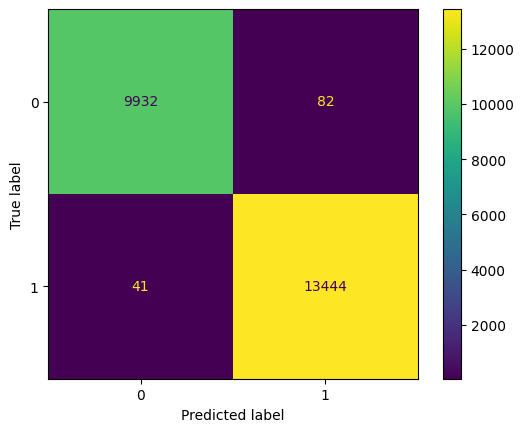

In [60]:
cm = confusion_matrix(y_test, y, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

Since for this problem the label for normal URL is 1, and phishing URL is 0, this model would be better if it would reduce the ammount of times it lies and leads to vulnerabilities (70), and in term, if needed, predict for malicious URL when in reality it is not (23), due to lower consequences in this context. This could be tweaked by playing with the probabilities threshold accepted by the model in order to make its predictions, making the model more cautious.

(Sklearn implementation of confusion matrix uses a reversed matrix relative to the ones we saw during classes but interpretation remains straight forward)

In [63]:
print(classification_report(y_test,y))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10014
           1       0.99      1.00      1.00     13485

    accuracy                           0.99     23499
   macro avg       0.99      0.99      0.99     23499
weighted avg       0.99      0.99      0.99     23499



# Modelling Neural Net

In [65]:
!python --version

Python 3.10.14


In [66]:
import torch
from torch.utils.data import DataLoader

In [67]:
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train[anova_selected].values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test[anova_selected].values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd 
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):
    def __init__(self, num_inputs=19, num_outputs=2,hidden_dim=12):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(num_inputs,hidden_dim)
        self.layer2 = nn.Linear(hidden_dim,num_outputs)


    def forward(self, x):
        # implement the forward pass
        x = F.relu(self.layer1(x))
        x = F.sigmoid(self.layer2(x))
        return x


In [69]:
model = Net()

In [71]:
!pip install torchviz

In [73]:
from torchviz import make_dot

In [74]:
import graphviz

In [77]:
y_ = model(X_test_tensor)

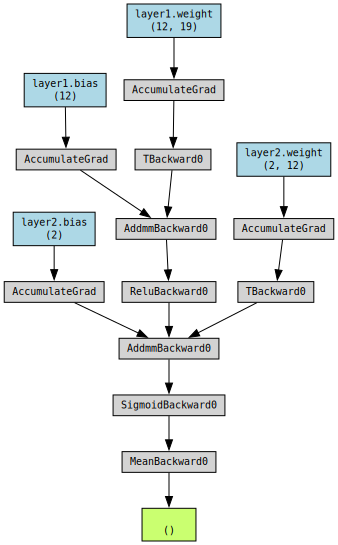

In [79]:
y_ = model(X_test_tensor)
make_dot(y_.mean(), params=dict(model.named_parameters()))

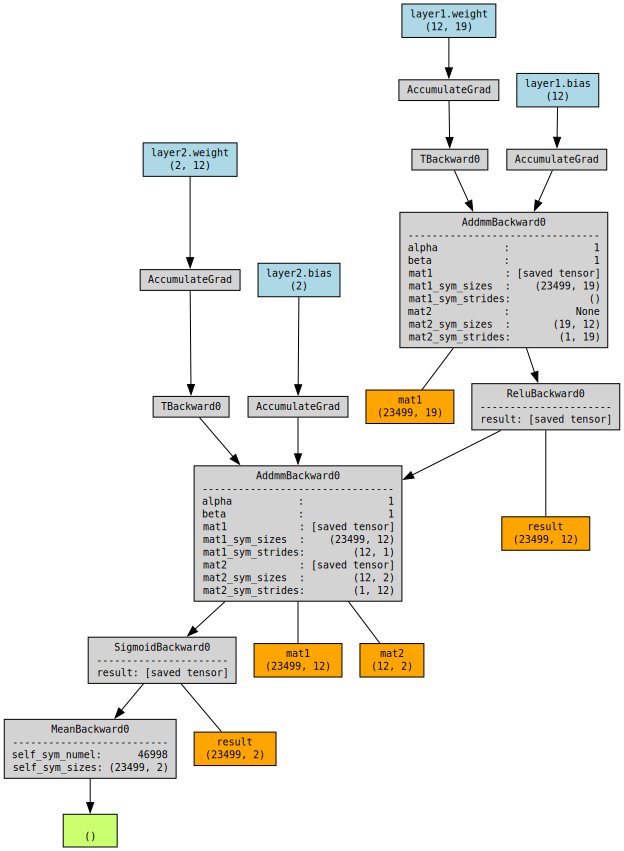

In [80]:
make_dot(y_.mean(), params=dict(model.named_parameters()), show_attrs=True, show_saved=True)


In [81]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    correct = 0  # For accuracy tracking
    total = 0
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
        # Calculate accuracy
        _, predicted = torch.max(pred, 1)
        correct += (predicted == y).sum().item()
        total += y.size(0)

    accuracy = correct / total * 100
    print(f"Train Accuracy: {accuracy:.4f}%")


def test_loop(dataloader, model, loss_fn):
    
    losses = []
    
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Accuracy: {(100*correct):>0.4f}%, Avg loss: {test_loss:>8f} \n")


In [82]:
learning_rate = 1e-3
batch_size = 356

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [83]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.738448  [  128/211488]
loss: 0.722298  [35728/211488]
loss: 0.708651  [71328/211488]
loss: 0.694712  [106928/211488]
loss: 0.684835  [142528/211488]
loss: 0.686293  [178128/211488]
loss: 0.656454  [213728/211488]
loss: 0.649353  [249328/211488]
loss: 0.654691  [284928/211488]
loss: 0.632726  [320528/211488]
loss: 0.629015  [356128/211488]
loss: 0.638582  [391728/211488]
loss: 0.614073  [427328/211488]
loss: 0.615031  [462928/211488]
loss: 0.606454  [498528/211488]
loss: 0.599545  [534128/211488]
loss: 0.603036  [569728/211488]
Train Accuracy: 51.3102%
Test Accuracy: 57.5386%, Avg loss: 0.598052 

Epoch 2
-------------------------------
loss: 0.584841  [  128/211488]
loss: 0.610123  [35728/211488]
loss: 0.593040  [71328/211488]
loss: 0.582682  [106928/211488]
loss: 0.592687  [142528/211488]
loss: 0.598121  [178128/211488]
loss: 0.556166  [213728/211488]
loss: 0.560775  [249328/211488]
loss: 0.571686  [284928/211488]
loss: 0.548749  [320528

In [84]:
import torch
from sklearn.metrics import f1_score

def evaluate_f1_score(dataloader, model):
    """Evaluates F1-score for a trained PyTorch model on a given dataloader."""
    model.eval()  # Set model to evaluation mode
    all_preds = []  # List to store all predictions
    all_labels = []  # List to store all true labels

    with torch.no_grad():  # Disable gradient computation for efficiency
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)  # Ensure data is on the correct device
            pred = model(X)
            
            # Get predicted class (assuming classification task)
            predicted_classes = pred.argmax(1)  # argmax returns the class with highest score
            
            # Store predictions and true labels
            all_preds.extend(predicted_classes.cpu().numpy())  # Convert to numpy and store
            all_labels.extend(y.cpu().numpy())  # Convert to numpy and store

    # Compute F1-score
    f1 = f1_score(all_labels, all_preds, average='weighted')  # Use 'weighted' for class imbalance
    print(f"F1-score: {f1:.4f}")
    return f1


In [85]:
# Assuming you have a trained model and a test dataloader
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)  # Move model to the correct device

# Call the function to evaluate F1-score
f1 = evaluate_f1_score(test_dataloader, model)

F1-score: 0.9900


In [89]:
import onnx

input_names = ["Phishing Inputs"]
output_names = ["Malicious or not Prediction"]

torch.onnx.export(model, X_train_tensor, "model.onnx", input_names=input_names, output_names=output_names)

## Final Notes

The key points of this challenge were the size of the data, requiring selective process for visualizations and exploration, and how to treat the data. Luckily log transformation was perfect for the models developed and scaling with MinMaxScaler or StandardScaler was discarded. Due to the good quality of the data and the way in which the patterns are clearly separated, the models in turn did not need to be as complex to achieve really good results.